# Single Image Augmentation

In here using the methods from pre_processor.py we will agument an image from dataset.

In [1]:
% matplotlib inline
import csv
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

/usr/local/lib/python3.5/dist-packages/matplotlib-2.0.0b4+2614.gde8bc33-py3.5-linux-x86_64.egg/matplotlib/cbook.py:128: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the matplotlib toolkit finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
def cropper(img):
    return img[72:132, 0:320]  # Crop y1:y2, x1:x2


def resize(img, dst_x, dst_y):
    rx = float(dst_x) / img.shape[1]
    ry = float(dst_y) / img.shape[0]
    return cv2.resize(img, (dst_x, dst_y))


def noise_gaus(image, prob):
    noise = np.zeros(image.shape, np.uint8)
    m = (0, 0, 0)
    s = (255 * prob, 255 * prob, 255 * prob)
    cv2.randn(noise, mean=m, stddev=s)
    return noise + image


def equalize(img):
    for i in range(3):
        img[:, :, i] = cv2.equalizeHist(img[:, :, i])
    return img


def blur_gaus(img):
    kernel = np.ones((3, 3), np.float32) / 25
    return cv2.filter2D(img, -1, kernel)


def normalize(img):
    return cv2.normalize(img, img, 0, 255, cv2.NORM_MINMAX)


def sho(img, word=""):
    if word != "": print(word)
    plt.imshow(img)
    plt.show()


def read_and_process_image(path: str, show=False):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return process_image(img, show)


def process_image(img, show=False):
    if show: sho(img, "Original")
    img = cropper(img)
    if show: sho(img, "Cropped")
    img = resize(img, 128, 32)
    if show: sho(img, "Resized")
    img = noise_gaus(img, 0.1)
    if show: sho(img, "Gaussian Noised")
    img = equalize(img)
    if show: sho(img, "Histogram Equalized")
    img = blur_gaus(img)
    if show: sho(img, "Gaussian Blurred")
    img = normalize(img)
    if show: sho(img, "Normalized")
    return img


def flip(img):
    return cv2.flip(img, 1)

## Pre-Processing steps and reasons:
1. Crop
    * Get rid of top sky, trees and bottom steering wheel because we don't need them.
2. Resize
    * Resize to 128x32 because it is faster to train and has enough detail.
3. Add Gaussian Noise
    * Random noise makes data prone to external noises and makes it generalize better, 
    like vaccinating the immune system with weakened microbes.
4. Histogram equalization
    * This maximizes the contrast and makes network prone to possible lighting conditions or shadows.
5. Gaussian Blur
    * This smoothens the image and prevents sharpness,
    we don't want singular pixel spikes, rather smooth multi-pixel spikes.
6. Normalize
    * As always, helps heavily images  treated equally, stretches them into same color space.

['data/IMG/center_2016_12_01_13_30_48_287.jpg']
Original


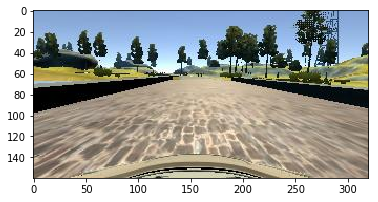

Cropped


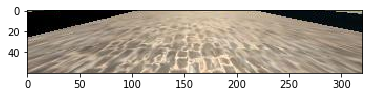

Resized


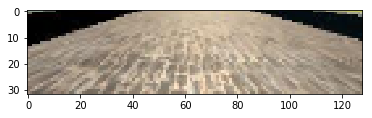

Gaussian Noised


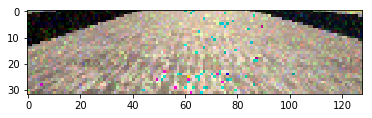

Histogram Equalized


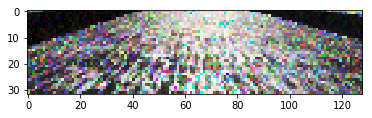

Gaussian Blurred


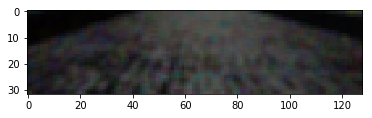

Normalized


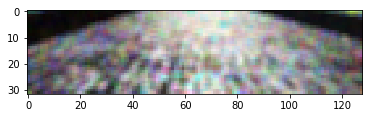

In [3]:
lines = []
with open('data/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
data_path = 'data/'

for line in lines[0:1]:
    # get rid of whitespaces in first 3 columns of csv and make list
    paths = [path.strip() for path in line[0:1]]
    # add data path before each element
    source_paths = [data_path + path for path in paths][0:1]
    print(source_paths)
    # images cen lef rig are read and processed from source paths
    imgs = [read_and_process_image(path, True) for path in source_paths]